In [3]:
import pandas as pd
import numpy as np

# Leitura das informações do arquivo "crx.names"
with open('crx.names', 'r') as names_file:
    lines = names_file.read().split('\n')[31:47]

# Extração das informações relevantes para os nomes das colunas
column_names = []
for line in lines:
    parts = line.split(':')
    column_names.append(f'{parts[0].strip()}')

# Leitura dos dados do arquivo "crx.data"
data_df = pd.read_csv('crx.data', header=None)

# Verifique se o número de colunas no arquivo de dados corresponde ao número de nomes de colunas
if len(data_df.columns) == len(column_names):
    data_df.columns = column_names
else:
    print("Número de colunas não corresponde ao número de nomes de colunas.")

# Visualização do DataFrame com os dados
print(data_df)

    A1     A2      A3 A4 A5  A6  A7    A8 A9 A10  A11 A12 A13    A14  A15 A16
0    b  30.83   0.000  u  g   w   v  1.25  t   t    1   f   g  00202    0   +
1    a  58.67   4.460  u  g   q   h  3.04  t   t    6   f   g  00043  560   +
2    a  24.50   0.500  u  g   q   h  1.50  t   f    0   f   g  00280  824   +
3    b  27.83   1.540  u  g   w   v  3.75  t   t    5   t   g  00100    3   +
4    b  20.17   5.625  u  g   w   v  1.71  t   f    0   f   s  00120    0   +
..  ..    ...     ... .. ..  ..  ..   ... ..  ..  ...  ..  ..    ...  ...  ..
685  b  21.08  10.085  y  p   e   h  1.25  f   f    0   f   g  00260    0   -
686  a  22.67   0.750  u  g   c   v  2.00  f   t    2   t   g  00200  394   -
687  a  25.25  13.500  y  p  ff  ff  2.00  f   t    1   t   g  00200    1   -
688  b  17.92   0.205  u  g  aa   v  0.04  f   f    0   f   g  00280  750   -
689  b  35.00   3.375  u  g   c   h  8.29  f   f    0   t   g  00000    0   -

[690 rows x 16 columns]


In [4]:
#Ver as informacoes dos dados
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [5]:
#Verificar se existem valores nulos
data_df.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [6]:
data_df['A1'].unique() #Os valores nulos estao representados em '?'

array(['b', 'a', '?'], dtype=object)

In [7]:
#Verificar os numero nulos existentes em cada coluna
inter = (data_df['A14'] == '?').sum()
inter

13

In [8]:
#Transformar a '?' em valor nulo
data_df = data_df.replace('?', np.nan)
data_df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [9]:
#Verifica se ha linhas duplicadas
duplicated = data_df.duplicated()
values = duplicated.any()

if values:
    print("Ha valores duplicados")
else:
    print("Nao ha valores duplicados")

Nao ha valores duplicados


In [10]:
#Dpulicar 15% dos valores do dataframe

# Calcule o número de duplicatas com base na porcentagem
num_duplicados = int(len(data_df) * 0.15)

# Selecione aleatoriamente um conjunto de linhas para duplicação
indices_duplicados = np.random.choice(len(data_df), num_duplicados, replace=False)

# Duplique as linhas selecionadas
duplicados = data_df.iloc[indices_duplicados]

# Adicione as duplicatas ao DataFrame original
data_df = pd.concat([data_df, duplicados], ignore_index=True)

# Verifique o DataFrame com as duplicatas
print(data_df)

    A1     A2      A3 A4 A5  A6  A7    A8 A9 A10  A11 A12 A13    A14   A15 A16
0    b  30.83   0.000  u  g   w   v  1.25  t   t    1   f   g  00202     0   +
1    a  58.67   4.460  u  g   q   h  3.04  t   t    6   f   g  00043   560   +
2    a  24.50   0.500  u  g   q   h  1.50  t   f    0   f   g  00280   824   +
3    b  27.83   1.540  u  g   w   v  3.75  t   t    5   t   g  00100     3   +
4    b  20.17   5.625  u  g   w   v  1.71  t   f    0   f   s  00120     0   +
..  ..    ...     ... .. ..  ..  ..   ... ..  ..  ...  ..  ..    ...   ...  ..
788  a  21.50   6.000  u  g  aa   v  2.50  t   t    3   f   g  00080   918   +
789  b  26.92   2.250  u  g   i  bb  0.50  f   f    0   t   g  00640  4000   -
790  a  58.33  10.000  u  g   q   v  4.00  t   t   14   f   g  00000  1602   +
791  b  38.17  10.125  u  g   x   v  2.50  t   t    6   f   g  00520   196   +
792  a  22.67   0.750  u  g   c   v  2.00  f   t    2   t   g  00200   394   -

[793 rows x 16 columns]


In [11]:
#Verifica novamente se ha linhas duplicadas
duplicated = data_df.duplicated()
values = duplicated.any()

if values:
    print("Ha valores duplicados")
else:
    print("Nao ha valores duplicados")

Ha valores duplicados


In [12]:
#Alterando os valores do ficheiro, para os valores reais
data_df['A1'] = data_df['A1'].map({'a':'Masculino', 'b':'Feminino'})
data_df['A9'] = data_df['A9'].map({'t':'True', 'f':'False'})
data_df['A10'] = data_df['A10'].map({'t':'True', 'f':'False'})
data_df['A12'] = data_df['A12'].map({'t':'True', 'f':'False'})
data_df['A16'] = data_df['A16'].map({'+':1, '-':0})
data_df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,Feminino,30.83,0.000,u,g,w,v,1.25,True,True,1,False,g,00202,0,1
1,Masculino,58.67,4.460,u,g,q,h,3.04,True,True,6,False,g,00043,560,1
2,Masculino,24.50,0.500,u,g,q,h,1.50,True,False,0,False,g,00280,824,1
3,Feminino,27.83,1.540,u,g,w,v,3.75,True,True,5,True,g,00100,3,1
4,Feminino,20.17,5.625,u,g,w,v,1.71,True,False,0,False,s,00120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,Masculino,21.50,6.000,u,g,aa,v,2.50,True,True,3,False,g,00080,918,1
789,Feminino,26.92,2.250,u,g,i,bb,0.50,False,False,0,True,g,00640,4000,0
790,Masculino,58.33,10.000,u,g,q,v,4.00,True,True,14,False,g,00000,1602,1
791,Feminino,38.17,10.125,u,g,x,v,2.50,True,True,6,False,g,00520,196,1


In [13]:
#Alterando o nome dos atributos(Colunas)
data_df = data_df.rename(columns={'A1': 'Sexo'})
data_df

,Sexo,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,Feminino,30.83,0.000,u,g,w,v,1.25,True,True,1,False,g,00202,0,1
1,Masculino,58.67,4.460,u,g,q,h,3.04,True,True,6,False,g,00043,560,1
2,Masculino,24.50,0.500,u,g,q,h,1.50,True,False,0,False,g,00280,824,1
3,Feminino,27.83,1.540,u,g,w,v,3.75,True,True,5,True,g,00100,3,1
4,Feminino,20.17,5.625,u,g,w,v,1.71,True,False,0,False,s,00120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,Masculino,21.50,6.000,u,g,aa,v,2.50,True,True,3,False,g,00080,918,1
789,Feminino,26.92,2.250,u,g,i,bb,0.50,False,False,0,True,g,00640,4000,0
790,Masculino,58.33,10.000,u,g,q,v,4.00,True,True,14,False,g,00000,1602,1
791,Feminino,38.17,10.125,u,g,x,v,2.50,True,True,6,False,g,00520,196,1


In [37]:
# Salvar o DataFrame em um arquivo CSV
data_df.to_csv('credit.csv', index=False)

#Lendo o ficheiro credit.csv
df = pd.read_csv('credit.csv')
df

,Sexo,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,Feminino,30.83,0.000,u,g,w,v,1.25,True,True,1,False,g,202.0,0,1
1,Masculino,58.67,4.460,u,g,q,h,3.04,True,True,6,False,g,43.0,560,1
2,Masculino,24.50,0.500,u,g,q,h,1.50,True,False,0,False,g,280.0,824,1
3,Feminino,27.83,1.540,u,g,w,v,3.75,True,True,5,True,g,100.0,3,1
4,Feminino,20.17,5.625,u,g,w,v,1.71,True,False,0,False,s,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,Masculino,21.50,6.000,u,g,aa,v,2.50,True,True,3,False,g,80.0,918,1
789,Feminino,26.92,2.250,u,g,i,bb,0.50,False,False,0,True,g,640.0,4000,0
790,Masculino,58.33,10.000,u,g,q,v,4.00,True,True,14,False,g,0.0,1602,1
791,Feminino,38.17,10.125,u,g,x,v,2.50,True,True,6,False,g,520.0,196,1


In [38]:
#Verifica novamente se ha linhas duplicadas
duplicated = df.duplicated()
values = duplicated.any()

if values:
    print("Ha valores duplicados")
else:
    print("Nao ha valores duplicados")

Ha valores duplicados


In [39]:
#Eliminado valores duplicados
df = df.drop_duplicates()
df

,Sexo,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,Feminino,30.83,0.000,u,g,w,v,1.25,True,True,1,False,g,202.0,0,1
1,Masculino,58.67,4.460,u,g,q,h,3.04,True,True,6,False,g,43.0,560,1
2,Masculino,24.50,0.500,u,g,q,h,1.50,True,False,0,False,g,280.0,824,1
3,Feminino,27.83,1.540,u,g,w,v,3.75,True,True,5,True,g,100.0,3,1
4,Feminino,20.17,5.625,u,g,w,v,1.71,True,False,0,False,s,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,Feminino,21.08,10.085,y,p,e,h,1.25,False,False,0,False,g,260.0,0,0
686,Masculino,22.67,0.750,u,g,c,v,2.00,False,True,2,True,g,200.0,394,0
687,Masculino,25.25,13.500,y,p,ff,ff,2.00,False,True,1,True,g,200.0,1,0
688,Feminino,17.92,0.205,u,g,aa,v,0.04,False,False,0,False,g,280.0,750,0


In [40]:
#Verificando valores nulos
df.isnull().sum()

Sexo    12
A2      12
A3       0
A4       6
A5       6
A6       9
A7       9
A8       0
A9       0
A10      0
A11      0
A12      0
A13      0
A14     13
A15      0
A16      0
dtype: int64

In [41]:
#Preenchendo os valores nulos fazendo a imputação
df.loc[:,'Sexo'] = df['Sexo'].fillna(df['Sexo'].mode().iloc[0]) #Preenche os valores nulos de acordo a moda
df.loc[:,'A2'] = df['A2'].fillna(df['A2'].mean()) #Preenche os valores de acordo a media
df.loc[:,'A4'] = df['A4'].fillna(df['A4'].mode().iloc[0])
df.loc[:,'A5'] = df['A5'].fillna(df['A5'].mode().iloc[0])
df.loc[:,'A6'] = df['A6'].fillna(df['A6'].mode().iloc[0])
df.loc[:,'A7'] = df['A7'].fillna(df['A7'].mode().iloc[0])
df.loc[:,'A14'] = df['A14'].fillna(df['A14'].mean()).round()
df.isnull().sum()

Sexo    0
A2      0
A3      0
A4      0
A5      0
A6      0
A7      0
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14     0
A15     0
A16     0
dtype: int64

In [42]:
#Transformar os dados categoricos em dados numericos
from sklearn.preprocessing import LabelEncoder

l1 = LabelEncoder()
l1.fit(df['Sexo'])
df.Sexo = l1.transform(df.Sexo)
df

C:\Users\arist\AppData\Local\Temp\ipykernel_31348\4029014208.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sexo = l1.transform(df.Sexo)


,Sexo,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,0,30.83,0.000,u,g,w,v,1.25,True,True,1,False,g,202.0,0,1
1,1,58.67,4.460,u,g,q,h,3.04,True,True,6,False,g,43.0,560,1
2,1,24.50,0.500,u,g,q,h,1.50,True,False,0,False,g,280.0,824,1
3,0,27.83,1.540,u,g,w,v,3.75,True,True,5,True,g,100.0,3,1
4,0,20.17,5.625,u,g,w,v,1.71,True,False,0,False,s,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,21.08,10.085,y,p,e,h,1.25,False,False,0,False,g,260.0,0,0
686,1,22.67,0.750,u,g,c,v,2.00,False,True,2,True,g,200.0,394,0
687,1,25.25,13.500,y,p,ff,ff,2.00,False,True,1,True,g,200.0,1,0
688,0,17.92,0.205,u,g,aa,v,0.04,False,False,0,False,g,280.0,750,0


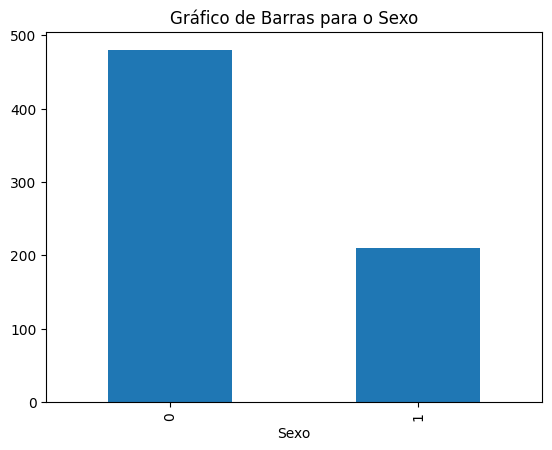

In [43]:
import seaborn as sb
import matplotlib.pyplot as plt

#Grafico de barras da coluna Sexo
df['Sexo'].value_counts().plot(kind='bar')
plt.title('Gráfico de Barras para o Sexo')
plt.show()

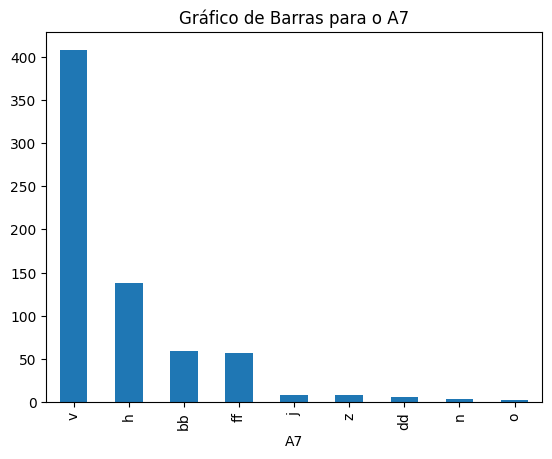

In [44]:
#Grafico de barras da coluna A7
df['A7'].value_counts().plot(kind='bar')
plt.title('Gráfico de Barras para o A7')
plt.show()

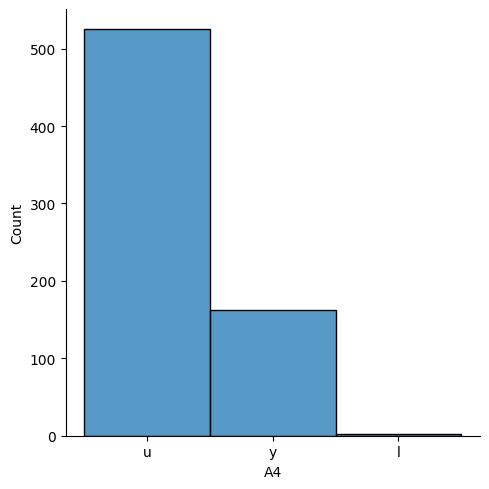

In [45]:
#Histograma da coluna A4
sb.displot(df['A4'])
plt.show()

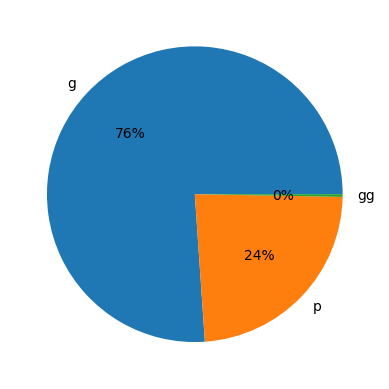

In [46]:
#Grafico de sectores da coluna A5
g = (df['A5'] == 'g').sum()
p = (df['A5'] == 'p').sum()
gg = (df['A5'] == 'gg').sum()

a7 = [g, p, gg]
period = ['g', 'p', 'gg']

plt.pie(a7, labels=period, autopct='%0.0f%%')
plt.show()

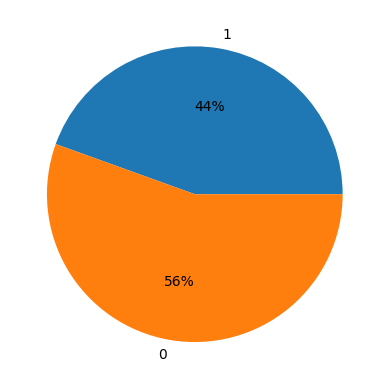

In [47]:
#Grafico de sectores da coluna A16
um = (df['A16'] == 1).sum()
zero = (df['A16'] == 0).sum()

a16 = [um, zero]
period = [1, 0]

plt.pie(a16, labels=period, autopct='%0.0f%%')
plt.show()